<a href="https://colab.research.google.com/github/QiliKiri/TensorFlow-2-for-Deep-Learning/blob/main/Week_2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [17]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])


In [18]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [29]:
# Build the Sequential convolutional neural network model

model = Sequential([
     Conv2D(16, (3,3), padding='SAME', strides=2, activation='relu', input_shape=(28,28,1)),
     MaxPooling2D((3,3)),
     Flatten(),
     Dense(10, activation='softmax')               
])

In [73]:
model = Sequential([
     Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)), 
     MaxPooling2D((3,3)),
     Flatten(),
     Dense(10, activation='softmax')               
])

In [74]:
# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [75]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.03)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=opt,
       loss=loss,
       metrics=['accuracy', 'mae'])

In [76]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.03>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [40]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [53]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [77]:
# Print the shape of the training data
print(train_images.shape) # 60000 28*28 pixel images
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [78]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [79]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255
test_images = test_images/255

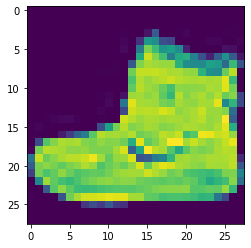

label: Ankle boot


In [80]:
# Display one of the images
img = train_images[0,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[0]]}')

#### Fit the model

In [90]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=64, verbose=1)

Epoch 1/8
938/938 [==============================] - 33s 35ms/step - loss: 2.3063 - accuracy: 0.0993 - mae: 4.4200
Epoch 2/8
938/938 [==============================] - 18s 20ms/step - loss: 2.3057 - accuracy: 0.1004 - mae: 4.4200
Epoch 3/8
938/938 [==============================] - 16s 17ms/step - loss: 2.3054 - accuracy: 0.0998 - mae: 4.4200
Epoch 4/8
938/938 [==============================] - 16s 18ms/step - loss: 2.3058 - accuracy: 0.1001 - mae: 4.4200
Epoch 5/8
938/938 [==============================] - 16s 17ms/step - loss: 2.3053 - accuracy: 0.1005 - mae: 4.4200
Epoch 6/8
938/938 [==============================] - 15s 16ms/step - loss: 2.3053 - accuracy: 0.1004 - mae: 4.4200
Epoch 7/8
938/938 [==============================] - 15s 16ms/step - loss: 2.3055 - accuracy: 0.0984 - mae: 4.4200
Epoch 8/8
938/938 [==============================] - 15s 16ms/step - loss: 2.3054 - accuracy: 0.1012 - mae: 4.4200


#### Plot training history

In [91]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,accuracy,mae
0,2.306321,0.099250,4.420000
1,2.305654,0.100367,4.420000
2,2.305365,0.099817,4.419998
3,2.305829,0.100150,4.420002
4,2.305340,0.100450,4.419997


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

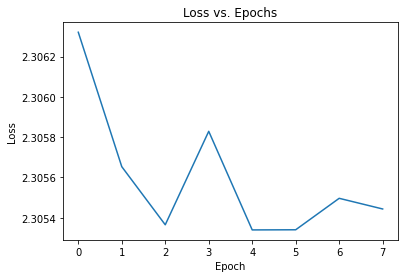

In [92]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epoch', ylabel='Loss')


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

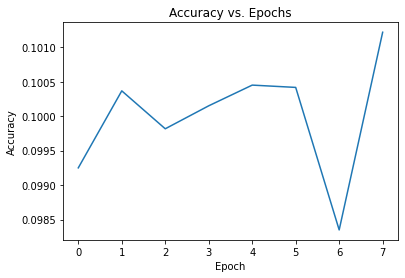

In [93]:
# Make a plot for the accuracy
accuracy_plot = df.plot(y='accuracy', title='Accuracy vs. Epochs', legend=False)
accuracy_plot.set(xlabel='Epoch', ylabel='Accuracy')


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epoch')]

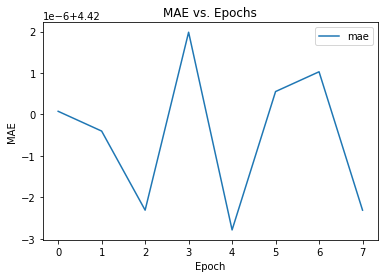

In [94]:
# Make a plot for the additional metric
metric_plot = df.plot(y='mae', title='MAE vs. Epochs', legend=True)
metric_plot.set(xlabel='Epoch', ylabel='MAE')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [89]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [97]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)


313/313 [==============================] - 2s 6ms/step - loss: 2.3054 - accuracy: 0.1000 - mae: 4.4200


#### Make predictions from the model

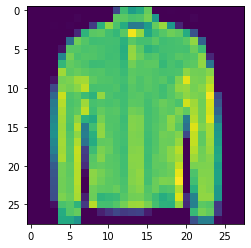

Label: Coat


In [98]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [103]:
# Get the model predictions
prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model prediction: {labels[np.argmax(prediction)]}')

Model prediction: Dress


In [104]:
prediction

array([[0.10329718, 0.09078003, 0.08949405, 0.11181346, 0.10675406,
        0.09998712, 0.10988362, 0.09605064, 0.10016131, 0.09177855]],
      dtype=float32)